In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import gpplot
import seaborn as sns

In [2]:
evers_2016 = pd.read_csv('../data/evers_2016/evers2016_activity.csv')

In [3]:
evers_2016.shape[0]

167

In [4]:
gilbert2014 = pd.read_csv('../data/gilbert_2014/gilbert2014_activity.csv')

In [5]:
gilbert2014.shape[0]

11835

In [6]:
horlbeck_2016_may = pd.read_csv('../data/horlbeck_2016_may/horlbeck2016_may_activity.csv')

In [7]:
horlbeck_2016_may.shape[0]

6542

In [8]:
horlbeck_2016_sept = pd.read_csv('../data/horlbeck_2016_sept/horlbeck2016_sept_activity.csv')

In [9]:
horlbeck_2016_sept.shape[0]

3446

In [10]:
sanson_2018 = pd.read_csv('../data/sanson_2018/sanson2018_activity.csv')

In [11]:
sanson_2018.shape[0]

4343

In [12]:
# dict_of_datasets = {'evers_2016':evers_2016, 'gilbert2014':gilbert2014, 
#                     'horlbeck_2016_may':horlbeck_2016_may,
#                     'horlbeck_2016_sept':horlbeck_2016_sept, 'sanson_2018':sanson_2018}
# horlbeck_2016_may is removed due to reasons explained in the previous post
dict_of_datasets = {'evers_2016':evers_2016, 'gilbert2014':gilbert2014, 
                    'horlbeck_2016_sept':horlbeck_2016_sept, 'sanson_2018':sanson_2018}

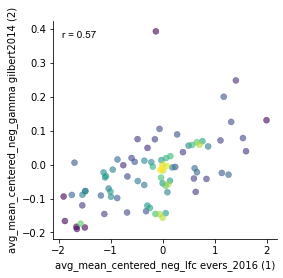

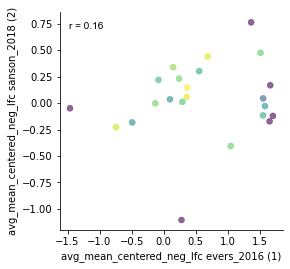

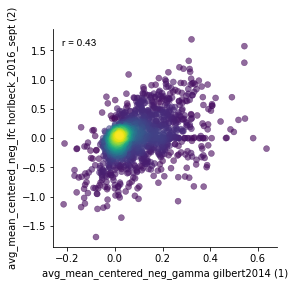

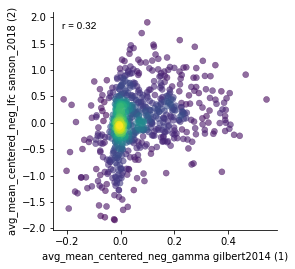

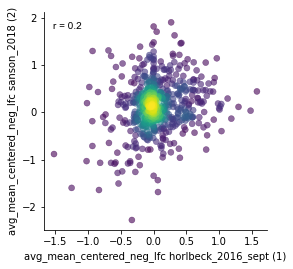

In [13]:
dataset_overlaps = []
for ds1 in dict_of_datasets:
    for ds2 in dict_of_datasets:
        if ds1 != ds2:
            dataset_overlap = dict()
            dataset_overlap['name_1'] = ds1
            dataset_overlap['name_2'] = ds2
            common_context = (dict_of_datasets[ds1]['sgRNA Context Sequence']
                              .isin(dict_of_datasets[ds2]['sgRNA Context Sequence'])
                              .sum())
            dataset_overlap['overlap'] = common_context
            if common_context > 10:
                ds1_rename = [col for col in dict_of_datasets[ds1] if col.startswith('avg_mean_centered_neg_')][0] + ' ' + ds1 + ' (1)'
                ds2_rename = [col for col in dict_of_datasets[ds2] if col.startswith('avg_mean_centered_neg_')][0] + ' ' + ds2 + ' (2)'
                merged_data = (dict_of_datasets[ds1]
                               .rename({[col for col in dict_of_datasets[ds1] if col.startswith('avg_mean_centered_neg_')][0]: ds1_rename}, axis=1)
                               .merge(dict_of_datasets[ds2]
                                      .rename({[col for col in dict_of_datasets[ds2] if col.startswith('avg_mean_centered_neg_')][0]: ds2_rename}, axis=1),
                                      how='inner',
                                      on = 'sgRNA Context Sequence'))
                if ds1 < ds2:
                    plt.subplots(figsize=(4, 4))
                    gpplot.point_densityplot(merged_data, x=ds1_rename,
                                             y=ds2_rename)
                    gpplot.add_correlation(merged_data, x=ds1_rename,
                                           y=ds2_rename)
                    sns.despine()
                cor = stats.pearsonr(merged_data[ds1_rename],
                                     merged_data[ds2_rename])[0]
                dataset_overlap['activity_cor'] = cor
            dataset_overlaps.append(dataset_overlap)

dataset_overlap_df = pd.DataFrame(dataset_overlaps)
filtered_overlap = dataset_overlap_df[(dataset_overlap_df['overlap'] > 0)].reset_index(drop=True)
# directional overlap
# filtered_overlap = (filtered_overlap.merge(dataset_summary_df
#                                            .rename({'name': 'name_1'}, axis=1),
#                                            how='inner', on='name_1'))
# filtered_overlap['fraction_overlap'] = filtered_overlap['overlap']/filtered_overlap['n_sgRNAs']

if guides in mutiple datasets, have it always in training or testing 
keep gene together; 

In [14]:
sgrna_dfs_list = list()
for key in dict_of_datasets:
    print(key)
    sgrna_dfs_list.append(dict_of_datasets[key][['sgRNA Context Sequence','sgRNA Sequence']])
sgrna_df = (pd.concat(sgrna_dfs_list)
            .drop_duplicates())

print(sgrna_df.shape[0])

evers_2016
gilbert2014
horlbeck_2016_sept
sanson_2018
17149


In [28]:
sgrna_df['sgRNA Context Sequence'][0:1]

0    AGAGAAAGCGGAGCTTCCGGCCGAGGGCCT
Name: sgRNA Context Sequence, dtype: object

In [19]:
sgrna_df

,sgRNA Context Sequence,sgRNA Sequence
0,AGAGAAAGCGGAGCTTCCGGCCGAGGGCCT,AAAGCGGAGCTTCCGGCCGA
1,ACACAACTTGGTTACGACCGGCTGCGGCAG,AACTTGGTTACGACCGGCTG
2,AAAAAAGAAAGGGGCAGCAGCGTCCGGGTT,AAGAAAGGGGCAGCAGCGTC
3,GGAGAAGAAGGCGGCTCCCGGAAGGGGGAG,AAGAAGGCGGCTCCCGGAAG
4,GCCGAAGGCGGTCTCAGAGCACCCCGGGTC,AAGGCGGTCTCAGAGCACCC
...,...,...
4338,AGACTTTGAGTGAGTCGGCGATCGCGGAAA,TTTGAGTGAGTCGGCGATCG
4339,AGAGTTTGCGTGGCGGGAACGCGGCGGCAG,TTTGCGTGGCGGGAACGCGG
4340,GCCTTTTGCTGGAAGAGCGCTGCTGGGGTT,TTTGCTGGAAGAGCGCTGCT
4341,GTGATTTGGCGGCTCCGACTGGCGCGGGAC,TTTGGCGGCTCCGACTGGCG


In [16]:
sgrna_df['PAM Sequence'].value_counts()

,sgRNA Sequence,sgRNA Context Sequence,Target Gene Symbol,On-Target Efficacy Score,avg_rank,avg_mean_centered_neg_lfc,avg_zscore_neg_lfc,avg_median_centered_neg_lfc,avg_robust_zscore_neg_lfc,avg_lfc
0,AAAAAAGACCTGTAGTACCA,TACCAAAAAAGACCTGTAGTACCATGGCTG,AASDHPPT,1.02900,0.666667,-0.181859,0.026925,-0.184069,0.160760,-0.248520
1,AAAACCCCTATCTTTCCCCT,AATCAAAACCCCTATCTTTCCCCTGGGAAG,SLC25A45,0.04180,0.500000,-0.140639,-0.587766,-0.051820,-0.246365,0.294602
2,AAAACCGCGACTCTTGCAAG,GTGGAAAACCGCGACTCTTGCAAGTGGGCA,UTP25,-0.36730,0.333333,-0.925867,-1.126259,-1.219490,-1.545397,-0.753058
3,AAAAGAAACGCTACCCGGCG,ACTAAAAAGAAACGCTACCCGGCGCGGCCC,ICE1,-0.88840,0.333333,-1.211013,-1.084625,-1.554769,-1.451024,-0.305991
4,AAAAGACTGACTTGTAATTC,CAAGAAAAGACTGACTTGTAATTCAGGGTG,OR8I2,-0.52760,0.666667,0.000711,-0.045143,-0.016339,-0.100917,0.018381
...,...,...,...,...,...,...,...,...,...,...
4338,TTTGAGTGAGTCGGCGATCG,AGACTTTGAGTGAGTCGGCGATCGCGGAAA,EIF3G,-0.45100,0.333333,-0.514245,-1.034263,-0.547674,-1.109769,-1.307914
4339,TTTGCGTGGCGGGAACGCGG,AGAGTTTGCGTGGCGGGAACGCGGCGGCAG,SHQ1,0.09185,0.500000,-0.141515,-0.119910,-0.106134,-0.179055,-1.434367
4340,TTTGCTGGAAGAGCGCTGCT,GCCTTTTGCTGGAAGAGCGCTGCTGGGGTT,DIS3,-0.12030,0.500000,-0.371164,-0.543451,-0.187727,-0.241280,-1.860843
4341,TTTGGCGGCTCCGACTGGCG,GTGATTTGGCGGCTCCGACTGGCGCGGGAC,KIF11,-0.47440,0.333333,-1.385476,-1.143972,-1.917821,-1.712922,0.083221


In [34]:
pam = [seq[24:27] for seq in sgrna_df['sgRNA Context Sequence']]

In [41]:
sgrna_df['PAM'] = pam

In [43]:
sgrna_df['PAM'].value_counts()

CGG    5683
GGG    4585
AGG    3722
TGG    3159
Name: PAM, dtype: int64

In [44]:
lower_seqs = sgrna_df.loc[sgrna_df['sgRNA Context Sequence'].str.contains('a|c|t|g'), 'sgRNA Sequence']


In [45]:
lower_seqs

Series([], Name: sgRNA Sequence, dtype: object)

In [46]:
filtered_overlap

,name_1,name_2,overlap,activity_cor
0,evers_2016,gilbert2014,83,0.572090
1,evers_2016,horlbeck_2016_sept,4,NaN
2,evers_2016,sanson_2018,23,0.163275
3,gilbert2014,evers_2016,83,0.572090
4,gilbert2014,horlbeck_2016_sept,1453,0.428915
5,gilbert2014,sanson_2018,722,0.318848
6,horlbeck_2016_sept,evers_2016,4,NaN
7,horlbeck_2016_sept,gilbert2014,1453,0.428915
8,horlbeck_2016_sept,sanson_2018,599,0.200644
9,sanson_2018,evers_2016,23,0.163275


In [47]:
sgrna_df.to_csv('../data/rs_dev_all_sgrnas.csv', index=False)
filtered_overlap.to_csv('../data/dataset_overlap.csv', index=False)